In [1]:
# Setting up neighborhoods
!wget https://dl3.pushbulletusercontent.com/Ro4uYYu9ThNyLCx7yDFhnuvl9ZUajx38/mask_c1.txt
!wget https://dl3.pushbulletusercontent.com/14l3I2G8NjC1ALwJkMLwrfW17bkpqEl1/mask_c2.txt
!wget https://dl3.pushbulletusercontent.com/RD728OQjsbGtevDXSclUfD8EmWYa5BUL/mask_c3.txt

!mkdir neighborhoods
!mv *.txt neighborhoods

--2023-03-12 15:22:12--  https://dl3.pushbulletusercontent.com/Ro4uYYu9ThNyLCx7yDFhnuvl9ZUajx38/mask_c1.txt
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1681 (1.6K) [text/plain]
Saving to: ‘mask_c1.txt’

mask_c1.txt         100%[===================>]   1.64K  --.-KB/s    in 0s      

2023-03-12 15:22:12 (31.6 MB/s) - ‘mask_c1.txt’ saved [1681/1681]

--2023-03-12 15:22:12--  https://dl3.pushbulletusercontent.com/14l3I2G8NjC1ALwJkMLwrfW17bkpqEl1/mask_c2.txt
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1681 (1.6K) [text/plain]
Saving to: ‘mask_c2.txt’

mask_c2.txt         100%[===

In [2]:
!sudo pip install deflate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 KB 3.0 MB/s eta 0:00:00


In [3]:
# MNCA (Fixed)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import deflate
import os
import sys
np.set_printoptions(threshold=sys.maxsize)



def extract_neighborhood_from_file(file_name):
    with open(file_name, "r") as f:
        lines = f.readlines()
        neighborhood = []
        for i, line in enumerate(lines):
            line = line.strip()
            for j, value in enumerate(line.split(" ")):
                if value == "1":
                    neighborhood.append((i-1, j-1))
        return neighborhood



def init_board(width, height, init_state):
    if init_state == "single cell in center":
        board = np.zeros((height, width), dtype=np.int)
        board[height//2, width//2] = 1
    elif init_state == "random cells with some probability":
        p = 0.50 # probability of a cell being alive
        board = np.random.choice([0, 1], size=(height, width), p=[1-p, p])
    elif init_state == "random cells with 2 different states":
        p1 = 0.40 # probability of a cell being state 1
        board = np.random.choice([0, 1, 2], size=(height, width), p=[1-p1, p1/2, p1/2])
    else:
        raise ValueError("Invalid initial state")
    return board

def mnca(range_of_neighborhood_sums):   

    ###############----CONSTANTS----###############
    width = 100
    height = 100
    steps = 50
    init_state = "random cells with some probability"
    # Fixed Neighbohoods
    nh1 = extract_neighborhood_from_file('neighborhoods/mask_c1.txt')
    nh2 = extract_neighborhood_from_file('neighborhoods/mask_c2.txt')
    nh3 = extract_neighborhood_from_file('neighborhoods/mask_c3.txt')

    neighborhoods = [nh1,nh2,nh3]
    # neighborhoods = [nh1,nh2]
    board_arr = []
    board = init_board(width, height, init_state)
    ###############----CONSTANTS----###############


    for eachstep in range(steps):
        new_board = np.zeros_like(board, dtype=int)
        height, width = board.shape
        for i in range(height):
            for j in range(width):
                next_state = board[i, j]
                for neighborhood, range_of_neighborhood_sum in zip(neighborhoods, range_of_neighborhood_sums):
                    cell_neighborhood = [board[(i + ni + height) % height, (j + nj + width) % width]
                                        for ni, nj in neighborhood]
                    
                    # # use this for sum
                    # neighborhood_sum = sum(cell_neighborhood)
                    
                    # use this for average
                    neighborhood_sum = sum(cell_neighborhood)/len(cell_neighborhood)
                    for lower, upper, new_next_state in range_of_neighborhood_sum:
                        if lower <= neighborhood_sum <= upper:
                            next_state = new_next_state
                new_board[i, j] = next_state
        board[:] = new_board[:]
        board_arr.append(board)
    # Calculate Deflate over that board array
    
    try:
        os.remove("board_arrays.txt")
        # print("Removed Successfully")
    except:
        pass
    with open("board_arrays.txt", "w") as output:
        output.write(str(board_arr))
    
    # filedata = open('board_arrays.txt', "rb").readlines()
    # print(filedata)
    filedata = open('board_arrays.txt', 'r', encoding='utf-8').readlines()
    filedata = ''.join(filedata).encode('utf-8')
    # print(filedata)
    compressed = deflate.gzip_compress(filedata, 8)
    deflate_value = compressed.__sizeof__()
    os.system("rm *.txt")
    return deflate_value



# # Testing handlers

# nh_sum1 = [(0.210,0.220,1),(0.350, 0.500, 0), (0.750, 0.850, 0)]
# nh_sum2 = [(0.100,0.280,0),(0.430, 0.550, 1), (0.120, 0.150, 0)]
# range_of_neighborhood_sums = [nh_sum1,nh_sum2]
# print(mnca(range_of_neighborhood_sums))




Streaming output truncated to the last 5000 lines.
 New loop of mutation starts here
👋👋👋👋👋👋👋👋👋POPULATION AFTER
[[[(0.84, 0.871, 0), (0.863, 0.916, 1)], [(0.309, 0.423, 1), (0.7, 0.824, 1), (0.351, 0.546, 0), (0.432, 0.576, 1)], [(0.598, 0.957, 1), (0.046, 0.578, 0), (0.596, 0.653, 1)]], [[(0.271, 0.518, 0), (0.038, 0.707, 0), (0.939, 0.961, 1), (0.28, 0.492, 1)], [(0.86, 0.97, 1), (0.457, 0.709, 0)], [(0.105, 0.458, 0)]], [[(0.424, 0.788, 0), (0.63, 0.788, 1), (0.644, 0.91, 0), (0.59, 0.96, 1), (0.14, 0.254, 0)], [(0.674, 0.879, 1), (0.068, 0.217, 1), (0.067, 0.606, 1)], [(0.451, 0.894, 1), (0.482, 0.724, 1)]], [[(0.118, 0.193, 0), (0.643, 0.966, 1), (0.847, 0.891, 0), (0.514, 0.912, 0)], [(0.868, 0.97, 1), (0.591, 0.811, 0), (0.603, 0.873, 1), (0.351, 0.744, 0)], [(0.234, 0.868, 1), (0.281, 0.724, 0)]], [[(0.333, 0.987, 0), (0.495, 0.75, 1)], [(0.991, 0.996, 0), (0.033, 0.32, 0), (0.945, 0.994, 1), (0.707, 0.856, 1)], [(0.315, 0.795, 1), (0.45, 0.713, 0), (0.028, 0.494, 1)]], [[(0.61,

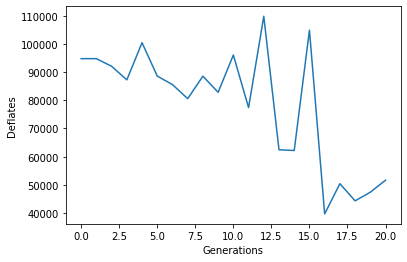

In [4]:
import numpy as np
import sys
import random
np.set_printoptions(threshold=sys.maxsize)

OVERALL_PROBABILITY_ATLEAST = 1
POPULATION_SIZE = 10 #3
GENERATION_SIZE = 20 #3
NUMBER_OF_NEIGHBORHOODS = 3 # for random number of nh put random function here
NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD = 3 # for random number of nh bounds put random function here

total_sum = 3*NUMBER_OF_NEIGHBORHOODS*NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD
# total_sum = 3*POPULATION_SIZE*NUMBER_OF_NEIGHBORHOODS*NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD


PROBABILITY_OF_INSERTING_A_NEW_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_REMOVING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_CHANGING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
# we take average as gene rather than sum because for sum we need to consider radius each time

# GENERATE RANDOM RULE
def generate_random_rule():
    number_of_neighborhood = NUMBER_OF_NEIGHBORHOODS
    number_of_bounds_in_each_neighborhod_average_or_sum = NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD
    rule = []
    for i in range(number_of_neighborhood):
        ranges = []
        for j in range(number_of_bounds_in_each_neighborhod_average_or_sum):
            lower = round(random.uniform(0, 1),3)
            upper = round(random.uniform(lower, 1),3)
            new_next_state = random.choice([0, 1]) # for 2 states
            # new_next_state = random.choice([0, 1, 2]) # for 3 states
            ranges.append((lower, upper, new_next_state))
        rule.append(ranges)
    return rule

# print(generate_random_rule())



# POPULATION
def init_population():
    population_size = POPULATION_SIZE
    population = []
    for i in range(population_size):
        individual = generate_random_rule()
        population.append(individual)
    return population


# print(init_population())

# FITNESS / DEFLATE
def calculate_deflate(genotype):
    deflate = mnca(genotype)
    return deflate

# poopulation = init_population()
# print(calculate_deflate(poopulation[0]))


# PROPORTIONATE SELECTION / ROULETTTE WHEEL SELECTION
def roulette_wheel_selection(population, fitness_values):

    sorted_population = [x for _,x in sorted(zip(fitness_values,population))]
    sorted_fitness_scores = [_ for _,x in sorted(zip(fitness_values,population))]
    fitness_values = sorted_fitness_scores
    population = sorted_population
    total_fitness = sum(fitness_values)
    probability_values = [fitness/total_fitness for fitness in fitness_values]
    cumulative_probability = np.cumsum(probability_values)
    selected_index = None
    random_value = random.uniform(0, 1)
    for i in range(len(population)):
        if random_value < cumulative_probability[i]:
            selected_index = i
            break

    return population[selected_index], fitness_values[selected_index]


# population = init_population()
# print("-----Intial Pop-----")
# print(population)
# print("-----Fitness Values-----")
# fitness_values = [calculate_deflate(individual) for individual in population]
# print(fitness_values)
# print("-----Selected Individual-----")
# selected_individual = roulette_wheel_selection(population, fitness_values)
# print(selected_individual)

# MUTATION FOR ADDING COMPLETELY NEW BOUND. PROMOTEES DIVERSITY.
def mutation(rule):
    try:
        print("►►►► in mutation function rule before mutation: ",str(rule))
        number_of_neighborhoods = len(rule)
        for i in range(number_of_neighborhoods):
            number_of_bounds = len(rule[i])
            for j in range(number_of_bounds):
                prob_insert = PROBABILITY_OF_INSERTING_A_NEW_RULE
                prob_remove = PROBABILITY_OF_REMOVING_A_RULE
                prob_change = PROBABILITY_OF_CHANGING_A_RULE
                random_value = random.uniform(0, 1)
                print("►►►►Probabilities of insert {}, remove {} and change {}.".format(prob_insert,prob_remove,prob_change))
                print("►►►►Tossed a coin to check what part of mutation needs to be performed, whether insertion / deletion / updation")
                print("►►►►Value of tossed coin is: ", random_value)
                # insert a value in the tuple rule
                if random_value < prob_insert:
                    print("►►►► In insertion mutation now ►►►►")
                    new_bound = []
                    # lower = rule[i][j][0]
                    # upper = rule[i][j][1]
                    # new_next_state = rule[i][j][2]
                    # toss_a_coin = random.uniform(0,1)
                    # if(toss_a_coin<0.33):
                    #     lower = round(random.uniform(0, 1),3)
                    # elif(0.33<toss_a_coin<0.66):
                    #     upper = round(random.uniform(lower, 1),3)
                    # else:
                    #     new_next_state = random.choice([0, 1])
                    lower = round(random.uniform(0, 1),3)
                    upper = round(random.uniform(0, 1),3)
                    new_next_state = random.choice([0, 1])
                    if(lower>upper):
                        temp = lower
                        lower = upper
                        upper = temp
                    new_bound.append((lower, upper, new_next_state))
                    print("►►►►rule before insert mutation: ", str(rule))
                    rule[i].extend(new_bound)
                    print("►►►► ►►►► In insertion part of the mutation code ►►►► ►►►►")
                    print("►►►►rule after insert mutation: ", str(rule))
                    print("the bound that has been added is: ",str(new_bound))
                    print("\n")
                # remove a tuple from the rule
                elif prob_insert <= random_value < prob_insert + prob_remove:
                    print("►►►► In removing a tuple mutation now ►►►►")
                    # add that code that allows not to wipe out the rule
                    # At least one tuple will stay in the rule set
                    # if rule length is more than 1, remove one rule tuple
                    if(len(rule[i])>1):
                        print("►►►► Rule before removing tuple mutation: ", str(rule))
                        removed_rule = rule[i].pop(j)
                        number_of_bounds -= 1
                        j -= 1
                        print("►►►► Rule after removing tuple mutation: ", str(rule))
                        print("►►►► rule removed is: ", removed_rule)
                        print("\n")

                    # if rule length is exactly 1 you cannot wipe out the rule, in that case
                    # perform mutation again. And it repeats till it does not fall in this code section.
                    else:
                        print("►►►► since the size of tuple is already small, not deleting anything, but sending again for mutation ►►►►")
                        print("►►►► the rule is: ", str(rule))
                        mutation(rule[i])
                    
                
                # change a tuple from the rule by adding a small change
                elif prob_insert + prob_remove <= random_value < prob_insert + prob_remove + prob_change:
                    print("►►►► In change a tuple from the rule by adding a small change mutation part ►►►►")
                    # lower = round(random.uniform(0, 1),3)
                    # upper = round(random.uniform(lower, 1),3)
                    # new_next_state = random.choice([0, 1])
                    delta = random.uniform(-0.100,0.100)
                    print("►►►► the rule before mutation is: ", str(rule))
                    print("►►►► delta introduced here: ", delta)
                    # if(rule[i][j][0]+delta<1 and rule[i][j][1]+delta>0 and rule[i][j][0]+delta< rule[i][j][1]+delta):
                    #     rule[i][j] = (round(rule[i][j][0]+(delta)), round(rule[i][j][1]+(delta)), rule[i][j][2])
                    toss_a_coin = random.uniform(0,1)
                    print("►►►► tossing another coin for tuples' three values, lower limit, upper limit and the next state: ", str(toss_a_coin))
                    if(toss_a_coin<0.33):
                        print("lower limit is going to be changed")
                        print("\n")
                        rule[i][j][0] = rule[i][j][0]+delta
                        if(rule[i][j][0] > 1):
                            rule[i][j][0] = 1
                        elif(rule[i][j][0] < 0):
                            rule[i][j][0] = 0
                    elif(0.33<toss_a_coin<0.66):
                        print("upper limit is going to be changed")
                        print("\n")
                        # rule[i][j][1] = round(random.uniform(0, 1),3)
                        rule[i][j][1] = rule[i][j][1]+delta
                        if(rule[i][j][1] > 1):
                            rule[i][j][1] = 1
                        elif(rule[i][j][1] < 0):
                            rule[i][j][1] = 0
                    else:
                        print("state value going to be changed")
                        print("\n")
                        if(rule[i][j][2] ==0):
                            rule[i][j][2] = 1
                        else:
                            rule[i][j][2] = 0
                    if(rule[i][j][0] > rule[i][j][1]):
                        temp = rule[i][j][0]
                        rule[i][j][0] = rule[i][j][1]
                        rule[i][j][1] = temp
                else:
                  print("►►►►►►►►No change")
                print("\n")
        print("►►►► ending in mutation function rule after mutation",str(rule))
        print("\n New loop of mutation starts here")
    except:
        # print("exception occured")
        pass
    return rule

# pop = init_population()
# print(pop[0])
# print("------------------------")
# print(mutation(pop[0]))

# # CROSSOVER
# def crossover(parent1, parent2):
#     number_of_neighborhoods = len(parent1)
#     child = []
#     for i in range(number_of_neighborhoods):
#         number_of_bounds = len(parent1[i])
#         bounds = []
#         for j in range(number_of_bounds):
#             parent1_bound = parent1[i][j]
#             parent2_bound = parent2[i][j]
#             random_value = random.uniform(0, 1)
#             if random_value <= 0.5:
#                 bounds.append(parent1_bound)
#             else:
#                 bounds.append(parent2_bound)
#         child.append(bounds)
#     return child


# pop = init_population()
# print("------------------------parent 1--------------------------")
# print(pop[0])

# print("------------------------parent 2--------------------------")
# print(pop[1])
# print("------------------------Child--------------------------")

# print(crossover(pop[0],pop[1]))

at_any_time_best_pop = []
at_any_time_best_deflates = []
deflates_for_plot = []
# GENETIC ALGORITHM
pop = init_population()
for generation in range(GENERATION_SIZE):

    print("\n")
    print("\n")
    print("\n")
    print("-----------Generation: "+str(generation)+"-----------")
    print("--------------------------------------------------")
    
    
    print("---------------------POPULATION-----------------------------")
    print("Population: ",str(pop))
    fitness_scores = [calculate_deflate(chromosome) for chromosome in pop]
    print("Fitness for the population this generation",str(fitness_scores))    
    print("------------------------------------------------------")
    print("\n")
    # print("\n")
    # print("\n")
    
    print("-------------------Selection---------------------------")
    selected_corpus_selection = []
    selected_corpus_selection_fitness = []
    for i in range(len(pop)):
        # Select chromosomes using tournament selection
        selected,fitness = roulette_wheel_selection(pop, fitness_scores)
        print("►►►► Selected rule in generation {} is : {}".format(str(generation),str(selected)))
        print("►►►► Selected rule fitness in generation {} is : {}".format(str(generation),str(fitness)))
        selected_corpus_selection.append(selected)
        selected_corpus_selection_fitness.append(fitness)
    selected_chromosomes_sorted = [x for _,x in sorted(zip(selected_corpus_selection_fitness,selected_corpus_selection))]
    selected_chromosomes_sorted_fitness = [_ for _,x in sorted(zip(selected_corpus_selection_fitness,selected_corpus_selection))]
    print("Selected Chromosmes sorted: ",selected_chromosomes_sorted)
    print("Selected Chromosmes sorted Fitness: ",selected_chromosomes_sorted_fitness)
    print("►►►► Most of the times rule selected or frequency of the rule {} with fitness in generation {} is : {}".format(str(selected_chromosomes_sorted[-1]),str(generation),str(selected_chromosomes_sorted_fitness[-1])))
    print("------------------------------------------------------")

    print("\n")
    # print("\n")
    # print("\n")
    
    print("-------------------Mutation---------------------------")
    # Check mutation function definition for debugging notes
    print("Picking chromosomes in the population for mutation")
    import copy
    mutating_pop = copy.deepcopy(pop)
    mutated_population = []
    print("Debugging while doing mutation (Entering Mutation Function and loop for mutation)")
    
    print("👋👋👋👋👋👋👋👋👋POPULATION BEFORE")
    print(pop)
    print("👋👋👋👋👋👋👋👋👋POPULATION BEFORE")
    for j in range(len(mutating_pop)):
        mutated_chromosome = mutation(mutating_pop[j])
        # Compare both lists
        mutated_population.append(mutated_chromosome)
        # print("😀😀😀😀😀😀😀😀😀Mutated pop",mutated_population)
    print("👋👋👋👋👋👋👋👋👋POPULATION AFTER")
    print(pop)
    print("👋👋👋👋👋👋👋👋👋POPULATION AFTER")

    print("\n")
    print("▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲ Debugging in mutation finally in Genetic algorithm ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    print("▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲ Debugging in mutation finally in Genetic algorithm ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    print("▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲ Debugging in mutation finally in Genetic algorithm ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")

    print("►►►►Population before mutation List1 ",pop)
    print("►►►►Population aafter mutation List2 ",mutated_population)
    # Get the minimum length of the two lists
    min_length = min(len(pop), len(mutated_population))

    # Loop through each element in the list up to the minimum length
    for a in range(min_length):
        # Get the minimum length of the sub-lists
        sub_min_length = min(len(pop[a]), len(mutated_population[a]))
        # Loop through each element in the sub-list up to the minimum length
        for b in range(sub_min_length):
            # Compare the elements of the two lists
            if pop[a][b] != mutated_population[a][b]:
                print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")
                print(f"Element {a},{b} has changed from {pop[a][b]} to {mutated_population[a][b]}")
                print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")
            # else:
            #     print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")
            #     print("No change in population")
            #     print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")


    pop = mutated_population      
    print("Mutated Population: ", pop)
    print("--------------------------------------------------")
    
    print("\n")
    # print("\n")
    # print("\n")

    # New code 1 march
    print("-------------------Preserving 1 Elite---------------------------")
    # preserve the elite from population itself
    elite_chromosome = selected_chromosomes_sorted[-1]
    elite_fitness = selected_chromosomes_sorted_fitness[-1]
    print("Elite Chromosome: ",elite_chromosome)
    print("Elite Chromosome Fitness: ",elite_fitness)
    # pop.append(elite_chromosome)
    
    # select elitee only on the basis of fitness and append it 
    # select adn mutate and ony 9 places has to be filled
    # mutate only remaining 9


    if(len(at_any_time_best_deflates)==0): # if elite list is empty
        at_any_time_best_deflates.append(elite_fitness)
        at_any_time_best_pop.append(elite_chromosome)
    if(elite_fitness<sorted(at_any_time_best_deflates)[-1]):
        at_any_time_best_deflates.append(calculate_deflate(at_any_time_best_pop[len(at_any_time_best_pop)-1]))
        at_any_time_best_pop.append(at_any_time_best_pop[len(at_any_time_best_pop)-1])
    else:
        at_any_time_best_deflates.append(elite_fitness)
        at_any_time_best_pop.append(elite_chromosome)
        
    print("----------------------------------------------------------------")


    print("Best Chromosome from this Generation: ",at_any_time_best_pop[-1])
    print("Best Chromosome Fitness from this Generation: ",at_any_time_best_deflates[-1])
    # deflates_for_plot.append(selected_chromosomes_sorted_fitness[-1])

    print("\n")
    print("\n")
    print("\n")

# # Select the chromosome with the highest fitness score from the final generation
# fitness_scores = [calculate_deflate(chromosome) for chromosome in at_any_time_best_pop]
# best_chromosome = at_any_time_best_pop[at_any_time_best_deflates.index(max(at_any_time_best_deflates))]
# print("FINAL BEST CHROMOSOME IS: {} with fitness score {}".format(str(best_chromosome),str(max(fitness_scores))))
# # return best_chromosome


import matplotlib.pyplot as plt
plt.plot(at_any_time_best_deflates)
plt.xlabel('Generations')
plt.ylabel('Deflates')
plt.savefig("plot.png")
